In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'KH/'
# deck = 'KH_subash/'
# deck = 'KH_400ppc/'
# deck = 'KH_800ppc/'
# deck = 'KH_new/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)

en_out = tb.read_energies(dirs) /(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])
twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/de']
ly = info['Ly/de']
nx = int(info['nx'])
ny = int(info['ny'])

lxLin = np.linspace(0,info['Lx/di'], int(info['nx']))
lyLin = np.linspace(0,info['Ly/di'], int(info['ny']))

In [3]:
t = times[100]
print(t)
ds = tb.load_vars(dirs, t)

50000


In [4]:
def kfilter(ar,kf , lx = 2 * np.pi, ly = 2 * np.pi):
   nx=np.shape(ar)[0]; ny=np.shape(ar)[1]
   kx = nf.fftshift(nf.fftfreq(nx))* 2 * np.pi * (nx/lx)
   ky = nf.fftshift(nf.fftfreq(ny))* 2 * np.pi * (ny/ly)
   mg=np.meshgrid(ky,kx)
   km=np.sqrt(mg[0]**2+mg[1]**2)
   far = nf.fftshift(nf.fftn(ar))
   far = (np.sign(km - kf) - 1.)/(-2.)*far
   arf = np.real(nf.ifftn(nf.ifftshift(far)))
   return kx, ky, far, arf

In [5]:
dse = tb.load_hydro(dirs, t, species = 'electron')
dsi = tb.load_hydro(dirs, t, species = 'ion')

dse = tb.load_hydro(dirs, t, species = 'electron')
dsi = tb.load_hydro(dirs, t, species = 'ion')

In [6]:
j = np.sqrt((dse['jz'] + dsi['jz'])**2)

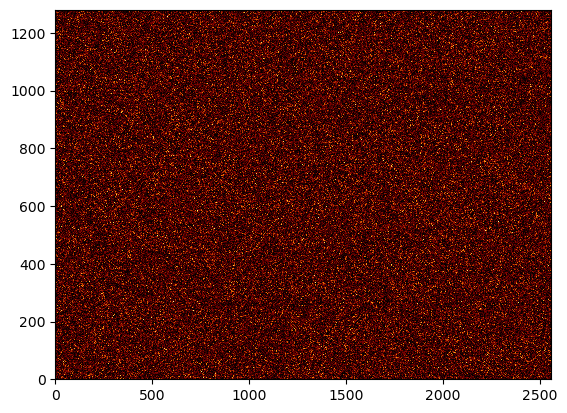

In [7]:
plt.pcolormesh(j, cmap = 'afmhot')

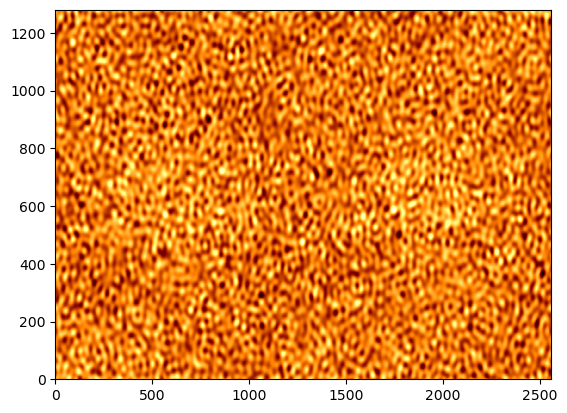

In [8]:
jz = tb.kfilter(j, kf = 2, lx = lx, ly = ly)
plt.pcolormesh(jz, cmap = 'afmhot')

In [9]:
path = dirs + 'filter_hdf5/'
try:  
    os.mkdir(path)  
except OSError as error:  
    print(error)

[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/'


In [10]:
def field_filter(dirs, kf = np.inf, lx = lx, ly = ly):
    times = tb.get_times(dirs)
    for i in np.arange(len(times)):
        t = times[i]
        dse = tb.load_vars(dirs, t, species = 'electron')
        cbx = tb.kfilter(dse['cbx'], kf = kf, lx = lx, ly = ly)
        cby = tb.kfilter(dse['cby'], kf = kf, lx = lx, ly = ly)
        cbz = tb.kfilter(dse['cbz'], kf = kf, lx = lx, ly = ly)
        ex = tb.kfilter(dse['ex'],   kf = kf, lx = lx, ly = ly)
        ey = tb.kfilter(dse['ey'],   kf = kf, lx = lx, ly = ly)
        ez = tb.kfilter(dse['ez'],   kf = kf, lx = lx, ly = ly)
        try:  
            os.mkdir(path + f'T.{t}/')  
        except OSError as error:  
            print(error)
        f = h5py.File(path + f'T.{t}/' + f'fields_{t}.h5', 'w')
        # print(cbx)
        f.create_dataset("cbx", data = cbx)
        f.create_dataset("cby", data = cby)
        f.create_dataset("cbz", data = cbz)
        f.create_dataset("ex", data = ex)
        f.create_dataset("ey", data = ey)
        f.create_dataset("ez", data = ez)
        f.close()

In [11]:
# for i in np.arange(len(times)):
#     t = times[i]
#     filt = 30
#     dse = tb.load_vars(dirs, t, species = 'electron')
#     jx = tb.kfilter(dse['jx'], filt, lx = lx, ly = ly)
#     jy = tb.kfilter(dse['jy'], filt, lx = lx, ly = ly)
#     jz = tb.kfilter(dse['jz'], filt, lx = lx, ly = ly)
#     px = tb.kfilter(dse['px'], filt, lx = lx, ly = ly)
#     py = tb.kfilter(dse['py'], filt, lx = lx, ly = ly)
#     pz = tb.kfilter(dse['pz'], filt, lx = lx, ly = ly)
#     txx = tb.kfilter(dse['txx'], filt, lx = lx, ly = ly)
#     tyy = tb.kfilter(dse['tyy'], filt, lx = lx, ly = ly)
#     tzz = tb.kfilter(dse['tzz'], filt, lx = lx, ly = ly)
#     txy = tb.kfilter(dse['txy'], filt, lx = lx, ly = ly)
#     tzx = tb.kfilter(dse['tzx'], filt, lx = lx, ly = ly)
#     tyz = tb.kfilter(dse['tyz'], filt, lx = lx, ly = ly)
#     rho = tb.kfilter(dse['rho'], filt, lx = lx, ly = ly)
#     try:  
#         os.mkdir(path + f'T.{t}/')  
#     except OSError as error:  
#         print(error)
#     e = h5py.File(path + f'T.{t}/' + f'electron_{t}.h5', 'w')
#     # print(cbx)
#     e.create_dataset("jx", data = jx)
#     e.create_dataset("jy", data = jy)
#     e.create_dataset("jz", data = jz)
#     e.create_dataset("px", data = px)
#     e.create_dataset("py", data = py)
#     e.create_dataset("pz", data = pz)
#     e.create_dataset("txx", data = txx)
#     e.create_dataset("tyy", data = tyy)
#     e.create_dataset("tzz", data = tzz)
#     e.create_dataset("txy", data = txy)
#     e.create_dataset("tzx", data = tzx)
#     e.create_dataset("tyz", data = tyz)
#     e.create_dataset("rho", data = rho)
#     e.close()

In [12]:
def hydro_filter(dirs, sp = 'electron', kf = np.inf, lx = lx, ly = ly):
    times = tb.get_times(dirs)
    for i in np.arange(len(times)):
        t = times[i]
        if i % 10 == 0:
            print(t)
        dse = tb.load_vars(dirs, t, species = sp)
        jx = tb.kfilter(dse['jx'],   kf = kf, lx = lx, ly = ly)
        jy = tb.kfilter(dse['jy'],   kf = kf, lx = lx, ly = ly)
        jz = tb.kfilter(dse['jz'],   kf = kf, lx = lx, ly = ly)
        px = tb.kfilter(dse['px'],   kf = kf, lx = lx, ly = ly)
        py = tb.kfilter(dse['py'],   kf = kf, lx = lx, ly = ly)
        pz = tb.kfilter(dse['pz'],   kf = kf, lx = lx, ly = ly)
        txx = tb.kfilter(dse['txx'], kf = kf, lx = lx, ly = ly)
        tyy = tb.kfilter(dse['tyy'], kf = kf, lx = lx, ly = ly)
        tzz = tb.kfilter(dse['tzz'], kf = kf, lx = lx, ly = ly)
        txy = tb.kfilter(dse['txy'], kf = kf, lx = lx, ly = ly)
        tzx = tb.kfilter(dse['tzx'], kf = kf, lx = lx, ly = ly)
        tyz = tb.kfilter(dse['tyz'], kf = kf, lx = lx, ly = ly)
        rho = tb.kfilter(dse['rho'], kf = kf, lx = lx, ly = ly)
        try:  
            os.mkdir(path + f'T.{t}/')  
        except OSError as error:  
            print(error)
        e = h5py.File(path + f'T.{t}/' + f'{sp}_{t}.h5', 'w')
        # print(cbx)
        e.create_dataset("jx", data = jx)
        e.create_dataset("jy", data = jy)
        e.create_dataset("jz", data = jz)
        e.create_dataset("px", data = px)
        e.create_dataset("py", data = py)
        e.create_dataset("pz", data = pz)
        e.create_dataset("txx", data = txx)
        e.create_dataset("tyy", data = tyy)
        e.create_dataset("tzz", data = tzz)
        e.create_dataset("txy", data = txy)
        e.create_dataset("tzx", data = tzx)
        e.create_dataset("tyz", data = tyz)
        e.create_dataset("rho", data = rho)
        e.close()

In [13]:
hydro_filter(dirs, sp = 'electron', kf = 5, lx = lx, ly = ly)

0


[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.0/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.1000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.1500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.2000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.2500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.3000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.3500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.4000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.4500/'
5000
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.5000/'
[Errno 17] File exists: '/pscratch/sd/g/go

In [14]:
hydro_filter(dirs, sp = 'ion', kf = 5, lx = lx, ly  = ly)

0
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.0/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.1000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.1500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.2000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.2500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.3000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.3500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.4000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.4500/'
5000
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.5000/'
[Errno 17] File exists: '/pscratch/sd/g/

In [15]:
field_filter(dirs, kf = 5, lx = lx, ly = ly)

[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.0/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.1000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.1500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.2000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.2500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.3000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.3500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.4000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.4500/'
[Errno 17] File exists: '/pscratch/sd/g/goodwill/KH_200ppc_200wci/filter_hdf5/T.5000/'
[Errno 17] File exists: '/pscratch/sd/g/goodwil

In [16]:
def load_field_fil(dirs, time_step, species = 'electron'):
    # hydro_file = h5py.File(dirs+"filter_hdf5/T."+str(time_step)+ "/" + species + "_"+str(time_step)+".h5", 'r')
    field_file = h5py.File(dirs+"filter_hdf5/T."+str(time_step)+"/fields_" + str(time_step)+".h5", 'r')
    var_dict = {}
    field_vars = ['cbx', 'cby', 'cbz', 'ex', 'ey', 'ez']
    # hydro_vars = ['jx', 'jy', 'jz', 'px', 'py', 'pz', 'txx', 'tyy', 'tzz', 'txy', 'tzx', 'tyz', 'rho']
    for i in field_vars:
        dset = field_file[i]
        var_dict[i] = np.array(dset[:,:])
    return (var_dict)

In [17]:
def load_hydro_fil(dirs, time_step, species = 'electron'):
    hydro_file = h5py.File(dirs+"filter_hdf5/T."+str(time_step)+ "/" + species + "_"+str(time_step)+".h5", 'r')
    # field_file = h5py.File(dirs+"filter_hdf5/T."+str(time_step)+"/fields_" + str(time_step)+".h5", 'r')
    var_dict = {}
    hydro_vars = ['jx', 'jy', 'jz', 'px', 'py', 'pz', 'txx', 'tyy', 'tzz', 'txy', 'tzx', 'tyz', 'rho']
    for i in hydro_vars:
        dset = hydro_file[i]
        var_dict[i] = np.array(dset[:,:])
    return (var_dict)

In [18]:
ds = load_field_fil(dirs, times[0], species = 'electron')
print(ds['ex'])

[[ 0.00193687  0.00193687  0.00193687 ...  0.00193687  0.00193687
   0.00193687]
 [ 0.00565844  0.00565844  0.00565844 ...  0.00565844  0.00565844
   0.00565844]
 [ 0.00894487  0.00894487  0.00894487 ...  0.00894487  0.00894487
   0.00894487]
 ...
 [-0.00894487 -0.00894487 -0.00894487 ... -0.00894487 -0.00894487
  -0.00894487]
 [-0.00565844 -0.00565844 -0.00565844 ... -0.00565844 -0.00565844
  -0.00565844]
 [-0.00193687 -0.00193687 -0.00193687 ... -0.00193687 -0.00193687
  -0.00193687]]


In [19]:
from TurbPy.vpic_info import *
from TurbPy.kfilter import *
from TurbPy.pderiv import *
# from TurbPy.load_vars import * 
import numpy as np
import pandas as pd

def ps_calc(dirs, timestep, species, kfilt = None, norm = False):
    ds = load_hydro_fil(dirs,timestep,species)
    vpic_info = get_vpic_info(dirs)

    dx = vpic_info['dx/de']
    dy = vpic_info['dy/de']
    mi_me = vpic_info['mi/me']


    ux = ds['jx']/ds['rho']
    uy = ds['jy']/ds['rho']
    uz = ds['jz']/ds['rho']

    # pxx = np.array(ds['txx'] - (ds['jx']/ds['rho'])*ds['px'])
    # pyy = np.array(ds['tyy'] - (ds['jy']/ds['rho'])*ds['py'])
    # pzz = np.array(ds['tzz'] - (ds['jz']/ds['rho'])*ds['pz'])
    # pxy = np.array(ds['txy'] - (ds['jx']/ds['rho'])*ds['py'])


    # pxx = np.array(ds['txx'] - ux*ds['px'])
    # pyy = np.array(ds['tyy'] - uy*ds['py'])
    # pzz = np.array(ds['tzz'] - uz*ds['pz'])
    # pxy = np.array(ds['txy'] - ()*ds['py'])
    pxx = ds['txx'] - ux*ds['px']; pyy = ds['tyy'] - uy*ds['py']; pzz = ds['tzz'] - uz*ds['pz']
    pxy = ds['txy'] - ux*ds['py']; pxz = ds['tzx'] - ux*ds['pz']; pyz = ds['tyz'] - uy*ds['pz']
    # pyx = ds['txy'] - uy*ds['px']; pzx = ds['tzx'] - uz*ds['px']; pzy = ds['tyz'] - uz*ds['py']
    # pyx = np.array(txy - (jy/rho)*px)
    # pxz = np.array(ds['tzx'] - (ds['jx']/ds['rho'])*ds['pz'])
    # pzx = np.array(tzx - (jz/rho)*px)
    # pyz = np.array(ds['tyz'] - (ds['jy']/ds['rho'])*ds['pz'])
    # pzy = np.array(tyz - (jz/rho)*py)
    # if kfilt != None:
    #     pxx = kfilter(np.array(ds['txx'] - (ds['jx']/ds['rho'])*ds['px']), kfilt)
    #     pyy = kfilter(np.array(ds['tyy'] - (ds['jy']/ds['rho'])*ds['py']), kfilt)
    #     pzz = kfilter(np.array(ds['tzz'] - (ds['jz']/ds['rho'])*ds['pz']), kfilt)
    #     pxy = kfilter(np.array(ds['txy'] - (ds['jx']/ds['rho'])*ds['py']), kfilt)
    #     pxz = kfilter(np.array(ds['tzx'] - (ds['jz']/ds['rho'])*ds['px']), kfilt)
    #     pyz = kfilter(np.array(ds['tyz'] - (ds['jy']/ds['rho'])*ds['pz']), kfilt)



    # particle_mass = 1
    # if species == 'ion':
    #     particle_mass = mi_me
    #     ux=ds['jx']/ds['rho']
    #     uy=ds['jy']/ds['rho']
    #     uz=ds['jz']/ds['rho']
        # ux = ds['px']/np.abs(ds['rho'])/particle_mass
        # uy = ds['py']/np.abs(ds['rho'])/particle_mass
        # uz = ds['pz']/np.abs(ds['rho'])/particle_mass
    # if species == 'electron':
    #     particle_mass = 1
    #     ux=ds['jx']/ds['rho']
    #     uy=ds['jy']/ds['rho']
    #     uz=ds['jz']/ds['rho']
        # ux = ds['px']/np.abs(ds['rho'])/particle_mass
        # uy = ds['py']/np.abs(ds['rho'])/particle_mass
        # uz = ds['pz']/np.abs(ds['rho'])/particle_mass
    # if kfilt != None:
    #     ux = kfilter(ds['px']/np.abs(ds['rho'])/particle_mass, kfilt)
    #     uy = kfilter(ds['py']/np.abs(ds['rho'])/particle_mass, kfilt)
    #     uz = kfilter(ds['pz']/np.abs(ds['rho'])/particle_mass, kfilt)

    dux_dx = pderiv(ux,dx=dx,ax=0,order=2,smth=None)
    duy_dx = pderiv(uy,dx=dx,ax=0,order=2,smth=None)
    duz_dx = pderiv(uz,dx=dx,ax=0,order=2,smth=None)
    dux_dy = pderiv(ux,dx=dy,ax=1,order=2,smth=None)
    duy_dy = pderiv(uy,dx=dy,ax=1,order=2,smth=None)
    duz_dy = pderiv(uz,dx=dy,ax=1,order=2,smth=None)    

    
    # dux_dx = (np.roll(ux,-1,axis=0)-np.roll(ux,1,axis=0))/(2 * dx)
    # duy_dx = (np.roll(uy,-1,axis=0)-np.roll(uy,1,axis=0))/(2 * dx)
    # duz_dx = (np.roll(uz,-1,axis=0)-np.roll(uz,1,axis=0))/(2 * dx)
    
    # dux_dy = (np.roll(ux,-1,axis=1)-np.roll(ux,1,axis=1))/(2 * dy)
    # duy_dy = (np.roll(uy,-1,axis=1)-np.roll(uy,1,axis=1))/(2 * dy)
    # duz_dy = (np.roll(uz,-1,axis=1)-np.roll(uz,1,axis=1))/(2 * dy)

    theta = np.array(dux_dx + duy_dy)

    Dxx = np.array(dux_dx) - (1/3)*theta 

    Dyy = np.array(duy_dy) - (1/3)*theta
    Dzz = 0 - (1/3)*theta
    
    Dxy = np.array((1/2)*(dux_dy + duy_dx))
    Dxz = np.array((1/2)*(duz_dx))
    Dyz = np.array((1/2)*(duz_dy))

    p = np.array(pxx + pyy + pzz)/3
    PIxx = pxx - p
    PIyy = pyy - p
    PIzz = pzz - p
    ptheta = - p * theta
    pid = -(PIxx*Dxx+PIyy*Dyy+PIzz*Dzz+ 2.* np.array(pxy*Dxy+pxz*Dxz+pyz*Dyz))
    if norm == True:
        pid_rms = np.sqrt(np.mean(pid**2))
        pid = pid/pid_rms

        pth_rms = np.sqrt(np.mean(ptheta**2))
        ptheta = ptheta/pth_rms
    return ptheta, pid

def ps_av(dirs, sp = 'electron', n = False, save = True):
  times = get_times(dirs)
  ps_av  = np.zeros(len(times))
  pid_av = np.zeros(len(times))
  pth_av = np.zeros(len(times))
  for t in np.arange(len(times)):
    pth, pid = ps_calc(dirs, times[t], sp , norm = False)
    ps = pth + pid
    pid_av[t] = np.average(pid)
    pth_av[t] = np.average(pth)
    # psi = psi/psi_rms
    ps_av[t] = pid_av[t] + pth_av[t]
  if save == True:
    pd.DataFrame({f'PS{sp[0]}': ps_av}).to_csv(dirs + f'ps{sp[0]}_av.csv', sep = ',')
  return ps_av

In [20]:
t = times[317]
pth, pid = ps_calc(dirs, t, species = 'ion')

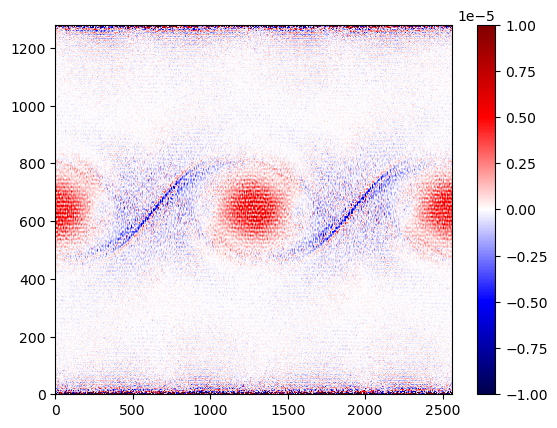

In [21]:
plt.pcolormesh(pid, cmap = 'seismic', vmin = -0.00001, vmax = 0.00001)
plt.colorbar()

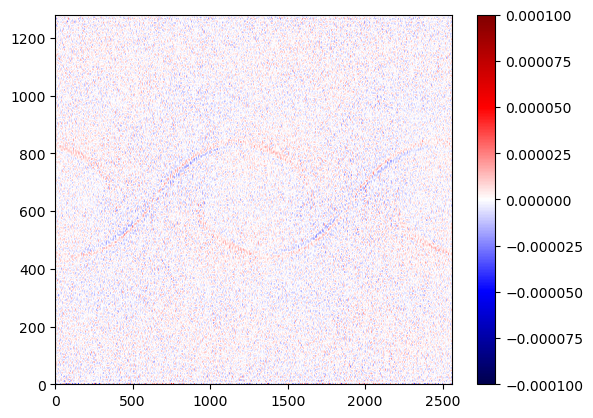

In [22]:
plt.pcolormesh(pth, cmap = 'seismic', vmin = -0.0001, vmax = 0.0001)
plt.colorbar()